# Assignment 5

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Processing, Cleaning and Merging

### Line Items

In [2]:
lineitem = pd.read_csv('20241216_export_pharmacy_receiptdata_lineitem.csv')
print(f"Length of lineitem: {len(lineitem)}")
lineitem.head()

/var/folders/cw/_c2hk43d7v31tkx47_ccfpwr0000gn/T/ipykernel_97279/2105515880.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  lineitem = pd.read_csv('20241216_export_pharmacy_receiptdata_lineitem.csv')


Length of lineitem: 12150015


,transaction_id,pzn,amount,quantity
0,4d327c97-99b3-4800-ba76-000000020967,12557966,893,1
1,4d327ded-0172-4f49-8489-000000001966,9298432,2200,1
2,4d327ded-0172-4f49-8489-000000001966,9605236,1180,1
3,4d328cea-54ad-4ba2-b851-000000012421,1126111,179,1
4,4d328cea-54ad-4ba2-b851-000000012421,2013219,299,1


In [3]:
lineitem_missing_data = lineitem.isnull().sum()

lineitem_duplicate_rows = lineitem.duplicated().sum()

lineitem_invalid_amounts = (lineitem["amount"] <= 0).sum()
lineitem_invalid_quantities = (lineitem["quantity"] <= 0).sum()

print("=== Missing Data ===")
print(lineitem_missing_data)

print("\n=== Invalid Numeric Data ===")
print(f"Negative values in 'amount': {lineitem_invalid_amounts}")
print(f"Negative values in 'quantity': {lineitem_invalid_quantities}")


print("\n=== Repeated Data ===")
all_lineitem_duplicates = lineitem[lineitem.duplicated()]

print(f"Repeated rows {len(all_lineitem_duplicates)}")
all_lineitem_duplicates.head(10)

=== Missing Data ===
transaction_id    0
pzn               0
amount            0
quantity          0
dtype: int64

=== Invalid Numeric Data ===
Negative values in 'amount': 32912
Negative values in 'quantity': 0

=== Repeated Data ===
Repeated rows 2756


,transaction_id,pzn,amount,quantity
900,4d3c38c5-95da-4ff2-9b3b-000000040967,18201503,1960,1
6889,4d830540-3c00-4259-af07-000000004427,18052351,4995,1
8434,4d94771d-1c26-48d3-a21c-000000006521,15881503,1955,1
15572,5b3c27e3-50e2-48b2-a1c8-000000023447,15863505,696,1
16149,5b424dfe-47e2-411f-9bc6-000000022135,8008455,195,1
16301,5b44a647-af0e-49c4-b1d6-000000013871,2882760,750,1
17060,5b4e051c-eb87-4ec3-8238-000000001471,6446599,1095,1
18956,5b63c192-a229-4a23-83a9-000000008351,13889038,1495,1
22558,5b8c95fc-1bf3-45d7-8bf3-000000000416,2340421,499,1
23602,5b99463c-ac7d-4dce-860a-000000049504,14171165,2050,1


In [4]:
cleaned_lineitem = lineitem.drop_duplicates()

cleaned_lineitem = cleaned_lineitem[
    (cleaned_lineitem["amount"] > 0) &
    (cleaned_lineitem["quantity"] > 0)
]

print(f"Remaining rows length: {len(cleaned_lineitem)}")

cleaned_lineitem.head(5)

Remaining rows length: 12114349


,transaction_id,pzn,amount,quantity
0,4d327c97-99b3-4800-ba76-000000020967,12557966,893,1
1,4d327ded-0172-4f49-8489-000000001966,9298432,2200,1
2,4d327ded-0172-4f49-8489-000000001966,9605236,1180,1
3,4d328cea-54ad-4ba2-b851-000000012421,1126111,179,1
4,4d328cea-54ad-4ba2-b851-000000012421,2013219,299,1


### Receipt

In [5]:
receipt = pd.read_csv('20241216_export_pharmacy_receiptdata_receipt.csv')
print(f"Length {len(receipt)}")
receipt.head()

Length 6571356


,transaction_id,retailer_id,gln,zipcode_area,pos_id,timestamp
0,0cd27cab-fa36-410e-8a05-000000898986,1051,1036331,82,1,2024-11-07 13:51:22
1,01e18514-bc0b-4f47-b26e-000000898836,1051,1036331,82,1,2024-11-07 14:28:04
2,90481553-50e3-4b89-b916-000000899679,1051,1036331,82,1,2024-11-07 14:45:09
3,d506586f-890b-45e3-83b4-000000899870,1051,1036331,82,1,2024-11-07 15:11:00
4,9d8ff431-c018-48e2-a6d1-000000900137,1051,1036331,82,1,2024-11-07 15:36:42


In [6]:
receipt_missing_data = receipt.isnull().sum()

receipt_duplicate_rows = receipt[receipt.duplicated()]

receipt_duplicate_transaction_ids = receipt[receipt["transaction_id"].duplicated()]

print("=== Missing Data ===")
print(receipt_missing_data)

print("\n=== Duplicate Rows ===")
print(f"Total duplicate rows: {len(receipt_duplicate_rows)}")
print(receipt_duplicate_rows.head(10))


print("\n=== Duplicate transaction IDs ===")
print(f"Duplicate transaction IDs: {len(receipt_duplicate_transaction_ids)}")
receipt_duplicate_transaction_ids.head(10)

=== Missing Data ===
transaction_id    0
retailer_id       0
gln               0
zipcode_area      0
pos_id            0
timestamp         0
dtype: int64

=== Duplicate Rows ===
Total duplicate rows: 0
Empty DataFrame
Columns: [transaction_id, retailer_id, gln, zipcode_area, pos_id, timestamp]
Index: []

=== Duplicate transaction IDs ===
Duplicate transaction IDs: 4710


,transaction_id,retailer_id,gln,zipcode_area,pos_id,timestamp
104784,2efb9eb9-ac67-401c-bd86-000001123626,1051,1040856,657,1,2024-12-09 14:44:24
104786,5eae1c1d-d851-4d25-bcbe-000001128342,1051,1040856,657,1,2024-12-10 10:01:46
104788,3f0f858c-0a81-4fda-ad6a-000001134068,1051,1040856,657,1,2024-12-10 15:31:17
299523,b635bf8c-941c-4478-af9f-000000028390,1051,1040856,657,1,2023-01-12 10:27:09
299525,cebcaaf6-6454-44ef-91d8-000000029966,1051,1040856,657,1,2023-01-12 15:08:02
299527,b3c4fa92-094f-4d8d-ba19-000000036141,1051,1040856,657,1,2023-01-14 09:56:02
299529,ad347788-e761-49ef-8ef9-000000036217,1051,1040856,657,1,2023-01-14 09:56:23
299531,83afe498-4f89-4804-8b51-000000039353,1051,1040856,657,1,2023-01-16 09:57:32
299533,624c44bb-f1ac-415a-ae6f-000000039283,1051,1040856,657,1,2023-01-16 09:57:53
299535,c240ab09-e117-4457-94a1-000000039288,1051,1040856,657,1,2023-01-16 09:58:22


In [7]:
cleaned_receipt = receipt.drop_duplicates(subset=['transaction_id'], keep='first')
print(f"Remaining rows length {len(cleaned_receipt)}")
cleaned_receipt.head(10)

Remaining rows length 6566646


,transaction_id,retailer_id,gln,zipcode_area,pos_id,timestamp
0,0cd27cab-fa36-410e-8a05-000000898986,1051,1036331,82,1,2024-11-07 13:51:22
1,01e18514-bc0b-4f47-b26e-000000898836,1051,1036331,82,1,2024-11-07 14:28:04
2,90481553-50e3-4b89-b916-000000899679,1051,1036331,82,1,2024-11-07 14:45:09
3,d506586f-890b-45e3-83b4-000000899870,1051,1036331,82,1,2024-11-07 15:11:00
4,9d8ff431-c018-48e2-a6d1-000000900137,1051,1036331,82,1,2024-11-07 15:36:42
5,e7e61c93-1679-416c-9604-000000901062,1051,1036331,82,1,2024-11-07 16:42:35
6,ad7e971f-a96d-4a6c-b5c6-000000901340,1051,1036331,82,1,2024-11-07 16:44:51
7,45ecffa1-9429-45a6-8724-000000901163,1051,1036331,82,1,2024-11-07 16:50:09
8,59e49326-7665-4278-b30e-000000901776,1051,1036331,82,1,2024-11-08 07:48:36
9,f5570987-6fad-4296-80df-000000901828,1051,1036331,82,1,2024-11-08 07:54:28


### Product

In [8]:
products = pd.read_csv('20241216_export_pharmacy_receiptdata_product.csv')
print(f"Length {len(products)}")
products.head()

Length 46550


,pzn,product_name
0,16762396,HANSAPLAST SPRUEHPFLASTER
1,3643419,NICORETTE 2MG FRESHMINT
2,7263487,PARACETAMOL RATIO LOESUNG
3,9298432,EUCERIN SUN KIDS 50+
4,4778073,HANSAPLAST FIX CLA5MX2.5CM


In [9]:
products_missing_data = products.isnull().sum()

products_duplicate_rows = products[products.duplicated(keep=False)]

products_duplicate_pzns = products[products["pzn"].duplicated(keep=False)]
products_duplicate_names = products[products["product_name"].duplicated(keep=False)]

print("=== Missing Data ===")
print(products_missing_data)

print("\n=== Duplicate Rows ===")
print(f"Total duplicate rows: {len(products_duplicate_rows)}")
print(products_duplicate_rows.head(10))

print("\n=== Duplicate PZNs ===")
print(f"Duplicate PZNs: {len(products_duplicate_pzns)}")
print(products_duplicate_pzns.head(10))

print("\n=== Duplicate Names ===")
print(f"Duplicate names: {len(products_duplicate_names)}")
print(products_duplicate_names.head(10))

=== Missing Data ===
pzn             0
product_name    0
dtype: int64

=== Duplicate Rows ===
Total duplicate rows: 0
Empty DataFrame
Columns: [pzn, product_name]
Index: []

=== Duplicate PZNs ===
Duplicate PZNs: 0
Empty DataFrame
Columns: [pzn, product_name]
Index: []

=== Duplicate Names ===
Duplicate names: 13575
         pzn                product_name
1    3643419     NICORETTE 2MG FRESHMINT
5    1900332                   TANNACOMP
6    4877929  SUPERPEP REISE KAUG DR20MG
8   13917740      LORANOPRO 5MG FILMTABL
11   7353612     NICORETTE 2MG WHITEMINT
17  15210884   MUCOSOLVAN 1XTAEGLICH RKP
22   1448168      EUPHRASIA AUGENTROPFEN
23   1578675  BEPANTHEN AUGEN+NASENSALBE
24   1578847  BEPANTHEN WUND U HEILSALBE
25   5702770       OCTENISAN WASCHLOTION


In [10]:
products_duplicate_rows = products[products['product_name'] == 'NICORETTE 2MG FRESHMINT']
products_duplicate_rows

,pzn,product_name
1,3643419,NICORETTE 2MG FRESHMINT
240,3643425,NICORETTE 2MG FRESHMINT
5065,6680071,NICORETTE 2MG FRESHMINT
7341,17594133,NICORETTE 2MG FRESHMINT
9735,703730,NICORETTE 2MG FRESHMINT
12695,7274717,NICORETTE 2MG FRESHMINT
13134,3827303,NICORETTE 2MG FRESHMINT
16551,7274812,NICORETTE 2MG FRESHMINT
32323,17620617,NICORETTE 2MG FRESHMINT


### Merging Datasets

In [11]:
merged_lineitem_receipt = pd.merge(cleaned_lineitem, cleaned_receipt, on="transaction_id", how="inner")

merged_data = pd.merge(merged_lineitem_receipt, products, on="pzn", how="inner")

merged_data['amount_euro'] = merged_data['amount'] / 100

print("=== Final Merged Dataset ===")
print(f"Length of merged data {len(merged_data)}")
merged_data.to_csv("20241216_merged_data.csv")
merged_data.head(10)

=== Final Merged Dataset ===
Length of merged data 11917591


,transaction_id,pzn,amount,quantity,retailer_id,gln,zipcode_area,pos_id,timestamp,product_name,amount_euro
0,4d327c97-99b3-4800-ba76-000000020967,12557966,893,1,1051,1176533,249,1,2023-03-06 13:17:44,VOMEX A REISE 50MG SUT,8.93
1,4d327ded-0172-4f49-8489-000000001966,9298432,2200,1,1051,1233381,750,1,2023-07-29 09:54:45,EUCERIN SUN KIDS 50+,22.00
2,4d327ded-0172-4f49-8489-000000001966,9605236,1180,1,1051,1233381,750,1,2023-07-29 09:54:45,CALMEDORON STREUKUEGELCHEN,11.80
3,4d328cea-54ad-4ba2-b851-000000012421,1126111,179,1,1051,1056033,333,1,2024-06-10 06:43:05,PARACETAMOL RATIO 500MG,1.79
4,4d328cea-54ad-4ba2-b851-000000012421,2013219,299,1,1051,1056033,333,1,2024-06-10 06:43:05,IBU 400 AKUT 1A PHARMA,2.99
5,4d328cea-54ad-4ba2-b851-000000012421,12550409,749,1,1051,1056033,333,1,2024-06-10 06:43:05,FENISTIL GEL,7.49
6,4d328f07-8bc4-4b98-9178-000000070091,5566226,681,1,1051,1214327,12,1,2024-07-05 15:16:43,BRONCHIPRET SAFT TE,6.81
7,4d329761-c63c-4b98-a326-000000181452,999831,395,1,1051,1201040,674,1,2024-06-27 09:40:35,NASENSPRAY RATIOPHARM ERW,3.95
8,4d329761-c63c-4b98-a326-000000181452,4884645,695,1,1051,1201040,674,1,2024-06-27 09:40:35,OTALGAN,6.95
9,4d3299bb-dba5-4267-b091-000000018631,1578847,1639,1,1051,2016562,261,1,2024-07-01 07:44:17,BEPANTHEN WUND U HEILSALBE,16.39


## Data Analyzing

In [12]:
data = pd.read_csv("20241216_merged_data.csv")
print(f"Length of data {len(data)}")
data.head(10)

Length of data 11917591


,Unnamed: 0,transaction_id,pzn,amount,quantity,retailer_id,gln,zipcode_area,pos_id,timestamp,product_name,amount_euro
0,0,4d327c97-99b3-4800-ba76-000000020967,12557966,893,1,1051,1176533,249,1,2023-03-06 13:17:44,VOMEX A REISE 50MG SUT,8.93
1,1,4d327ded-0172-4f49-8489-000000001966,9298432,2200,1,1051,1233381,750,1,2023-07-29 09:54:45,EUCERIN SUN KIDS 50+,22.00
2,2,4d327ded-0172-4f49-8489-000000001966,9605236,1180,1,1051,1233381,750,1,2023-07-29 09:54:45,CALMEDORON STREUKUEGELCHEN,11.80
3,3,4d328cea-54ad-4ba2-b851-000000012421,1126111,179,1,1051,1056033,333,1,2024-06-10 06:43:05,PARACETAMOL RATIO 500MG,1.79
4,4,4d328cea-54ad-4ba2-b851-000000012421,2013219,299,1,1051,1056033,333,1,2024-06-10 06:43:05,IBU 400 AKUT 1A PHARMA,2.99
5,5,4d328cea-54ad-4ba2-b851-000000012421,12550409,749,1,1051,1056033,333,1,2024-06-10 06:43:05,FENISTIL GEL,7.49
6,6,4d328f07-8bc4-4b98-9178-000000070091,5566226,681,1,1051,1214327,12,1,2024-07-05 15:16:43,BRONCHIPRET SAFT TE,6.81
7,7,4d329761-c63c-4b98-a326-000000181452,999831,395,1,1051,1201040,674,1,2024-06-27 09:40:35,NASENSPRAY RATIOPHARM ERW,3.95
8,8,4d329761-c63c-4b98-a326-000000181452,4884645,695,1,1051,1201040,674,1,2024-06-27 09:40:35,OTALGAN,6.95
9,9,4d3299bb-dba5-4267-b091-000000018631,1578847,1639,1,1051,2016562,261,1,2024-07-01 07:44:17,BEPANTHEN WUND U HEILSALBE,16.39


### Data Processing

In [13]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

data['hour'] = data['timestamp'].dt.hour
data['date'] = data['timestamp'].dt.date
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year
data['week_number'] = data['timestamp'].dt.isocalendar().week
data['day_of_month'] = data['timestamp'].dt.day
data['day_type'] = data['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

### Aggregated Metrics

In [14]:
total_revenue = data['amount_euro'].sum()
print(f"Total Revenue: {total_revenue:.2f} EUR")

total_quantity = data['quantity'].sum()
print(f"Total Quantity Sold: {total_quantity}")

total_transactions = data['transaction_id'].nunique()
print(f"Total Transactions: {total_transactions}")

avg_transaction_value = data.groupby('transaction_id')['amount_euro'].sum().mean()
print(f"Average Transaction Value (EUR): {avg_transaction_value:.2f}")

total_product_name_count = data['product_name'].nunique()
print(f"Total Product Name Count: {total_product_name_count}")

total_product_name_count = data['pzn'].nunique()
print(f"Total Pharmazentralnummer: {total_product_name_count}")

Total Revenue: 154317146.59 EUR
Total Quantity Sold: 13018131
Total Transactions: 6482325
Average Transaction Value (EUR): 23.81
Total Product Name Count: 35842
Total Pharmazentralnummer: 43300


## Bonus Task

Top 10 Brands by Unique PZN Count:
      Brand  Unique PZN Count
     Kneipp               335
Roche Posay               317
      Vichy               306
     Weleda               236
    Eucerin               185
    Sebamed               129
 Hansaplast               126
     Linola                68
   Cetaphil                60
 Neutrogena                32


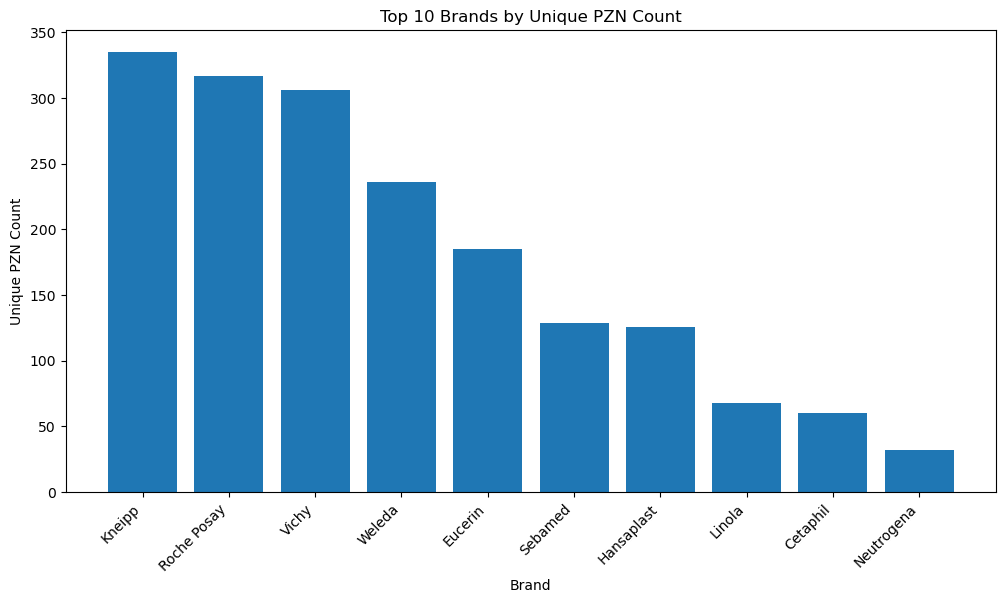

In [15]:
# Define a list of well-known brands
brand_list = [
    'Eucerin', 'Vichy', 'Sebamed', 'Linola', 'Roche Posay',
    'Kneipp', 'Sinupret', 'La Roche-Posay', 'Avène', 'Weleda',
    'Bepanthen', 'Voltaren', 'Durex', 'Hansaplast', 'Nivea',
    'Cetaphil', 'Neutrogena', 'Aspirin', 'Iberogast'
]

# Add a new column to identify the brand in each product name
products['brand'] = products['product_name'].apply(
    lambda x: next((brand for brand in brand_list if brand.lower() in x.lower()), None)
)

# Filter products with identified brands
branded_products = products.dropna(subset=['brand'])

# Group by brand and count unique PZN numbers
brand_pzn_count = branded_products.groupby('brand')['pzn'].nunique().reset_index()
brand_pzn_count.columns = ['Brand', 'Unique PZN Count']

# Sort the results by PZN count in descending order
brand_pzn_count = brand_pzn_count.sort_values(by='Unique PZN Count', ascending=False)

# Resetear el índice después de ordenar
brand_pzn_count = brand_pzn_count.sort_values(by='Unique PZN Count', ascending=False).reset_index(drop=True)

# Mostrar los Top 10 sin el índice
print("Top 10 Brands by Unique PZN Count:")
print(brand_pzn_count.head(10).to_string(index=False))
# Visualization of the top brands
plt.figure(figsize=(12, 6))
plt.bar(brand_pzn_count['Brand'].head(10), brand_pzn_count['Unique PZN Count'].head(10))
plt.title('Top 10 Brands by Unique PZN Count')
plt.xlabel('Brand')
plt.ylabel('Unique PZN Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### Analyzing by PZN

Top 10 Most Sold PZNs:
pzn
999831      613120
3929274     360729
1126111     334998
571748      284367
705309      192054
2340421     175904
1580241     154180
8585997     122833
1479157     121012
12550409    120918
Name: quantity, dtype: int64


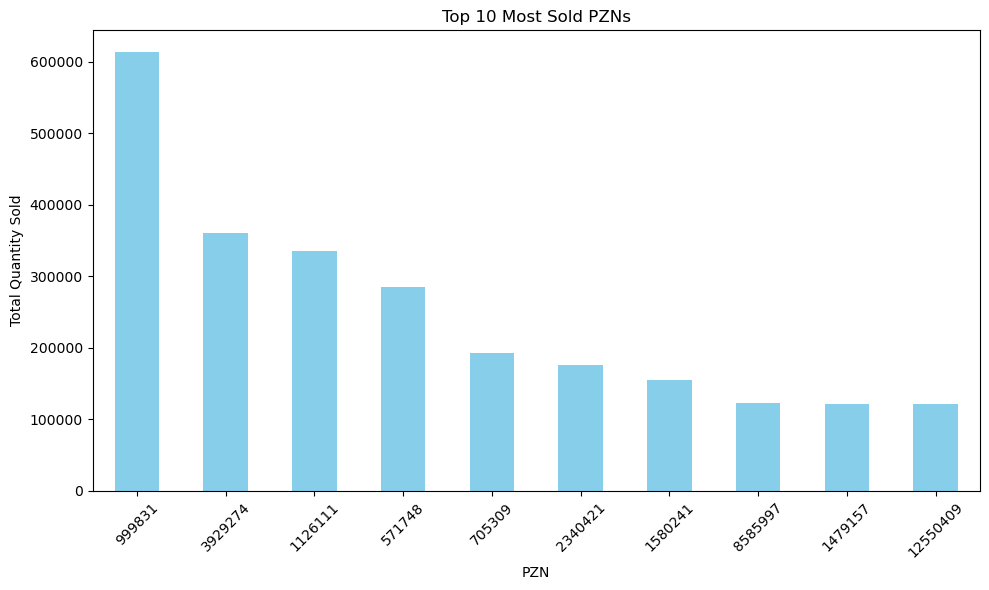

In [16]:
top_pzns = data.groupby('pzn')['quantity'].sum().sort_values(ascending=False).head(10)

print("Top 10 Most Sold PZNs:")
print(top_pzns)

plt.figure(figsize=(10, 6))
top_pzns.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Sold PZNs")
plt.xlabel("PZN")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
data['zipcode_area'] = data['zipcode_area'].astype(str)
data['zipcode_first_digit'] = data['zipcode_area'].str[0]
data['zipcode_first_two_digits'] = data['zipcode_area'].str[:2]

In [18]:
selected_pzn = top_pzns.index[7]

selected_pzn_data = data[data['pzn'] == selected_pzn]

print(f"Analyzing PZN: {selected_pzn}, Name {selected_pzn_data['product_name'].iloc[0]}")

selected_pzn_data.head(5)

Analyzing PZN: 8585997, Name PROSPAN HUSTENSAFT


,Unnamed: 0,transaction_id,pzn,amount,quantity,retailer_id,gln,zipcode_area,pos_id,timestamp,...,hour,date,day_of_week,month,year,week_number,day_of_month,day_type,zipcode_first_digit,zipcode_first_two_digits
61,61,4d33119e-ee3f-4c78-802b-000000004571,8585997,625,1,1051,1242988,911,1,2023-10-27 12:16:36,...,12,2023-10-27,4,10,2023,43,27,Weekday,9,91
64,64,4d33219f-063d-4de1-b01c-000000328264,8585997,947,1,1051,1135764,815,1,2023-12-20 12:51:08,...,12,2023-12-20,2,12,2023,51,20,Weekday,8,81
81,81,4d3329b7-0038-48e9-8276-000000068232,8585997,949,1,1051,2028054,672,1,2023-11-20 06:22:45,...,6,2023-11-20,0,11,2023,47,20,Weekday,6,67
336,336,4d35fcd6-3da7-4aa2-879d-000000005564,8585997,947,1,1051,1243452,737,1,2023-10-24 14:45:39,...,14,2023-10-24,1,10,2023,43,24,Weekday,7,73
533,533,4d37dc24-68a1-4112-89c7-000000019125,8585997,849,1,1051,1085284,404,1,2023-11-08 11:44:28,...,11,2023-11-08,2,11,2023,45,8,Weekday,4,40


### Analyze regional dependent price variations in comparison to the mean price (1st digit)

PZN: 8585997, Name PROSPAN HUSTENSAFT mean price: 9.203985183303702


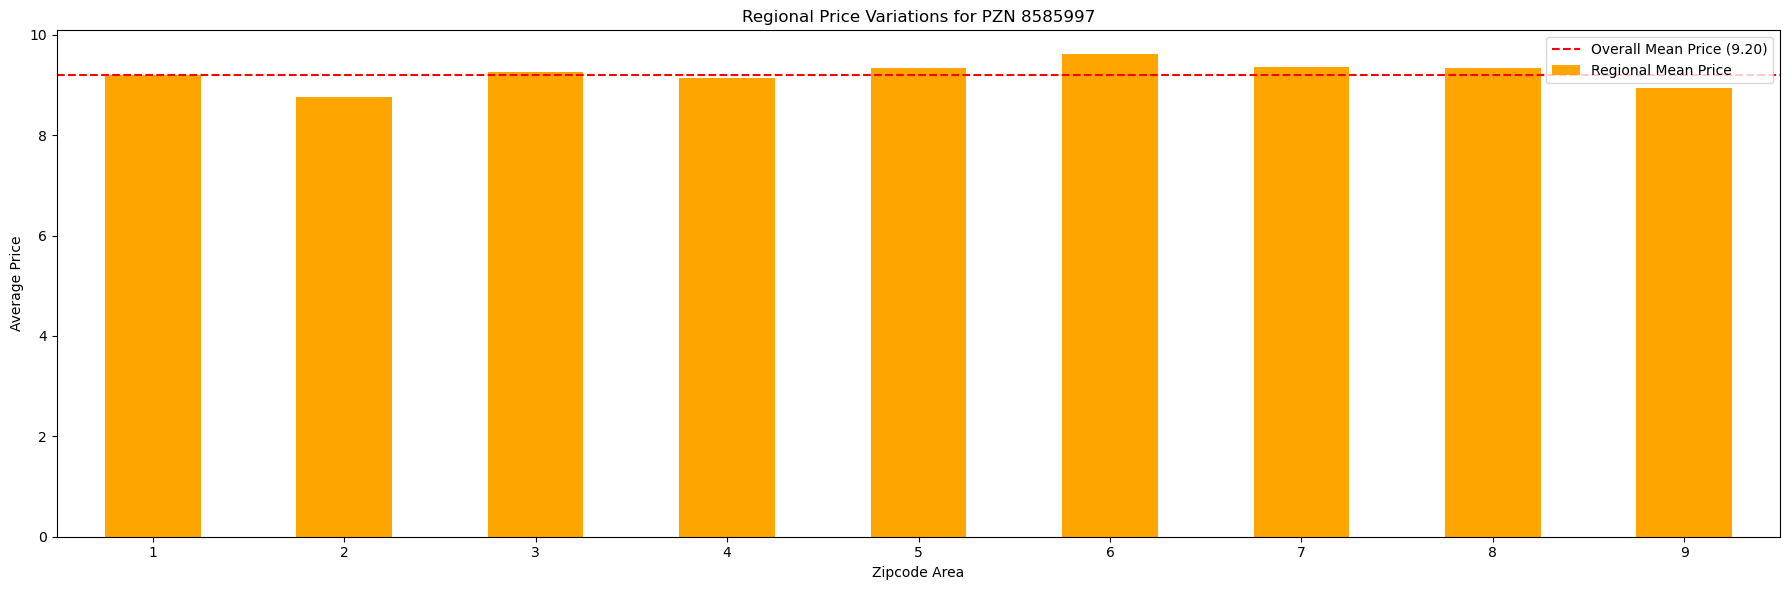

Regional Price Variations:
zipcode_first_digit
1    9.200486
2    8.766063
3    9.260897
4    9.133761
5    9.338955
6    9.607766
7    9.364406
8    9.332635
9    8.948716
Name: amount_euro, dtype: float64


In [19]:
mean_price = selected_pzn_data['amount_euro'].mean()
print(f"PZN: {selected_pzn}, Name {selected_pzn_data['product_name'].iloc[0]} mean price: {mean_price}")

regional_prices = selected_pzn_data.groupby('zipcode_first_digit')['amount_euro'].mean()

plt.figure(figsize=(18, 6))
regional_prices.plot(kind='bar', color='orange', label='Regional Mean Price')
plt.axhline(y=mean_price, color='red', linestyle='--', label=f'Overall Mean Price ({mean_price:.2f})')
plt.title(f"Regional Price Variations for PZN {selected_pzn}")
plt.xlabel("Zipcode Area")
plt.ylabel("Average Price")
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Regional Price Variations:")
print(regional_prices)

### Analyze regional dependent price variations in comparison to the mean price (1st 2 digit)

PZN: 8585997, Name PROSPAN HUSTENSAFT mean price: 9.203985183303702


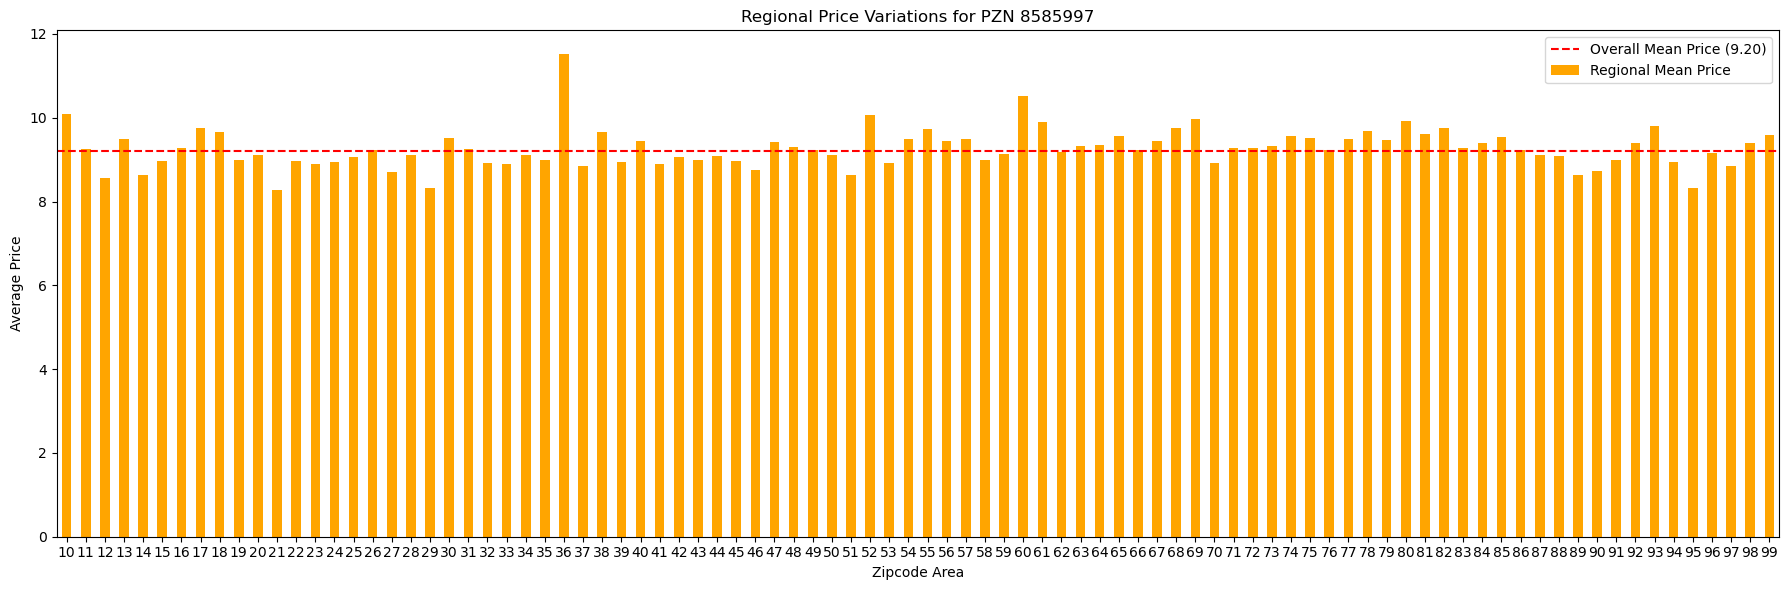

Regional Price Variations:
zipcode_first_two_digits
10    10.088291
11     9.249032
12     8.566871
13     9.482669
14     8.633001
        ...    
95     8.311696
96     9.148331
97     8.839513
98     9.403125
99     9.578057
Name: amount_euro, Length: 90, dtype: float64


In [20]:
mean_price = selected_pzn_data['amount_euro'].mean()
print(f"PZN: {selected_pzn}, Name {selected_pzn_data['product_name'].iloc[0]} mean price: {mean_price}")

regional_prices = selected_pzn_data.groupby('zipcode_first_two_digits')['amount_euro'].mean()

plt.figure(figsize=(18, 6))
regional_prices.plot(kind='bar', color='orange', label='Regional Mean Price')
plt.axhline(y=mean_price, color='red', linestyle='--', label=f'Overall Mean Price ({mean_price:.2f})')
plt.title(f"Regional Price Variations for PZN {selected_pzn}")
plt.xlabel("Zipcode Area")
plt.ylabel("Average Price")
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Regional Price Variations:")
print(regional_prices)

### Analyze time dependent price variations in comparison to the mean price (Month)

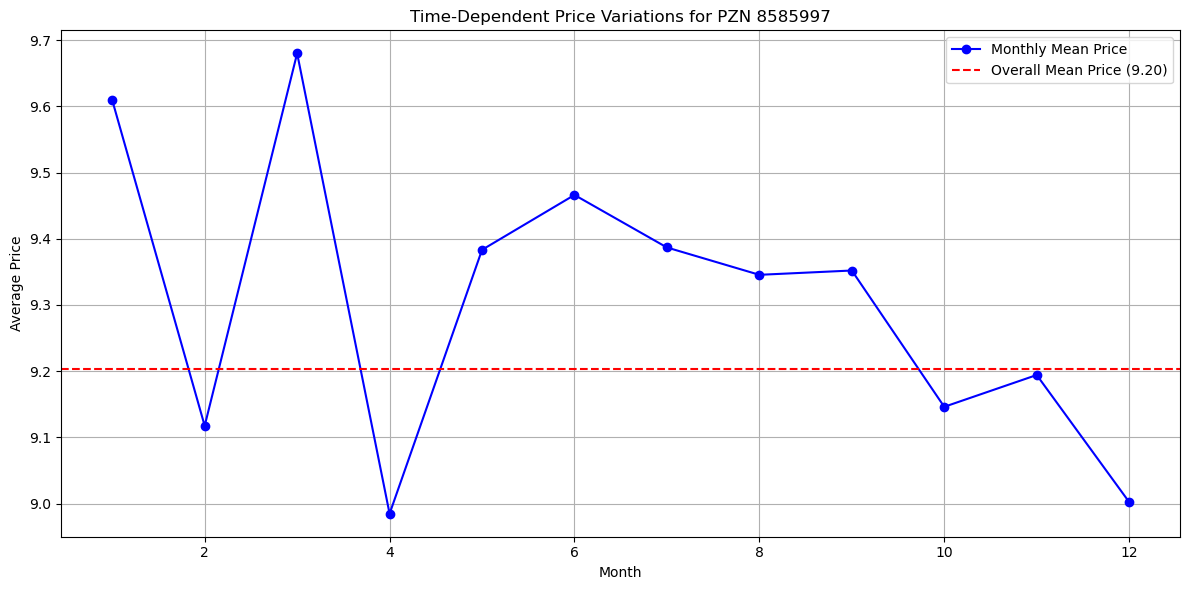

Monthly Price Variations:
month
1     9.609238
2     9.117515
3     9.680000
4     8.984790
5     9.383296
6     9.466154
7     9.386851
8     9.345547
9     9.352049
10    9.146224
11    9.194252
12    9.002423
Name: amount_euro, dtype: float64


In [21]:
monthly_prices = selected_pzn_data.groupby(selected_pzn_data['month'])['amount_euro'].mean()

plt.figure(figsize=(12, 6))
monthly_prices.plot(kind='line', marker='o', color='blue', label='Monthly Mean Price')
plt.axhline(y=mean_price, color='red', linestyle='--', label=f'Overall Mean Price ({mean_price:.2f})')
plt.title(f"Time-Dependent Price Variations for PZN {selected_pzn}")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly Price Variations:")
print(monthly_prices)

### Analyze time dependent price variations in comparison to the mean price (Year)

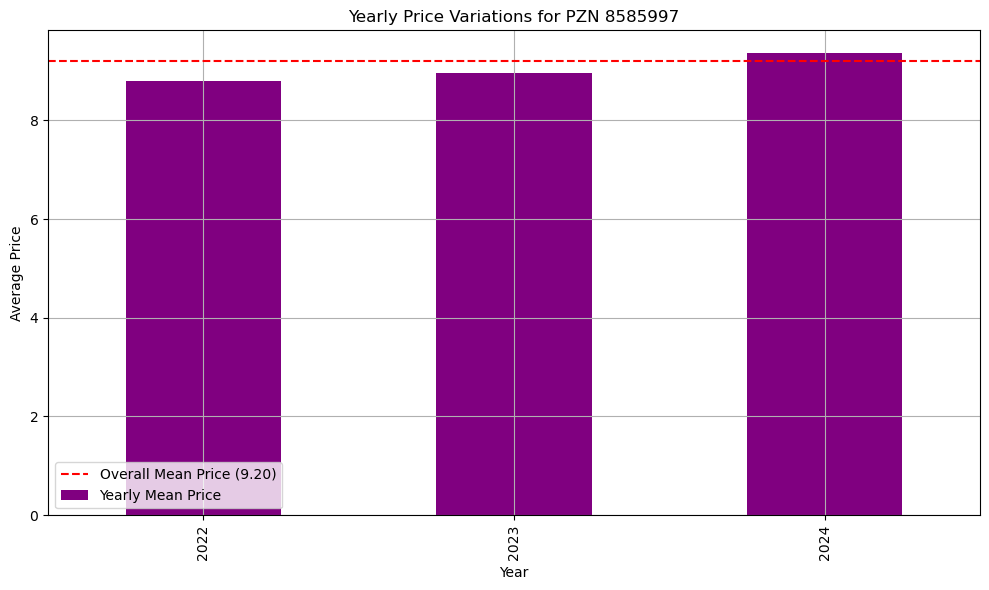

Yearly Price Variations:
year
2022    8.793581
2023    8.955631
2024    9.355114
Name: amount_euro, dtype: float64


In [22]:
yearly_prices = selected_pzn_data.groupby(selected_pzn_data['year'])['amount_euro'].mean()

plt.figure(figsize=(10, 6))
yearly_prices.plot(kind='bar', color='purple', label='Yearly Mean Price')
plt.axhline(y=mean_price, color='red', linestyle='--', label=f'Overall Mean Price ({mean_price:.2f})')
plt.title(f"Yearly Price Variations for PZN {selected_pzn}")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Yearly Price Variations:")
print(yearly_prices)